# Package

In [1]:
!pip install smote_variants==0.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=3f5adac47bd41ad83b08363c9a169def4cfd2788bbca87a3154bf6347e5463fe
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=8c075d32dfb62d278129f3f381f153c585428c1978c06b47279fc7cfdb252ccd
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [2]:
!pip install -U pyloras

# Imports

In [3]:
import torch
import numpy as np
import pandas as pd
from time import time
import torch.nn as nn
from tqdm import tqdm
import tensorflow as tf
import torch.optim as optim
#import smote_variants as sv
from google.colab import drive
from collections import Counter
from keras.models import Sequential
#from deepctr.models import DeepFM
from keras.optimizers import Adam
from keras.metrics import Accuracy
from keras import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.utils import to_categorical
from torchvision.models import shufflenet_v2_x1_0
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, metrics
from torch.utils.data import DataLoader, TensorDataset
from keras.layers import Dense, BatchNormalization, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, GlobalAveragePooling1D, Add, LSTM, AveragePooling1D, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, Dropout, concatenate,Flatten, GaussianNoise, MaxPooling1D, Concatenate, GRU, LayerNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from time import time


# Load data

In [4]:
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/National Family and Health Survey-5.csv")
#data=data.iloc[:2000,:]
data.shape

Mounted at /content/drive


(136136, 95)

# **Preprocessing**

In [5]:
data.head()

,Res_Age,State,Edu_level,Water_Source_Time,Toilet_Facility,House_electricity,House_radio,House_tv,House_bicycle,House_motorcycle,...,Religion_Sikh,Ethnicity_No caste / tribe,Ethnicity_Tribe,ResidenceType_Urban,Water_Source_Natural Source,Water_Source_Other,Water_Source_Piped,DPT_full,MEASLES_full,JE_full
0,38,Jammu & Kashmir,2,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,39,Jammu & Kashmir,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,30,Jammu & Kashmir,2,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
3,32,Jammu & Kashmir,2,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,29,Jammu & Kashmir,2,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136136 entries, 0 to 136135
Data columns (total 95 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Res_Age                           136136 non-null  int64  
 1   State                             136136 non-null  object 
 2   Edu_level                         136136 non-null  int64  
 3   Water_Source_Time                 136136 non-null  int64  
 4   Toilet_Facility                   136136 non-null  int64  
 5   House_electricity                 136136 non-null  int64  
 6   House_radio                       136136 non-null  int64  
 7   House_tv                          136136 non-null  int64  
 8   House_bicycle                     136136 non-null  int64  
 9   House_motorcycle                  136136 non-null  int64  
 10  House_car                         136136 non-null  int64  
 11  Household_members                 136136 non-null  i

In [7]:
# Assuming 'column_name' is the column you want to convert from object to float
data['State'] = pd.factorize(data.State)[0]

In [8]:
data.isnull().sum()

Res_Age               0
State                 0
Edu_level             0
Water_Source_Time     0
Toilet_Facility       0
                     ..
Water_Source_Other    0
Water_Source_Piped    0
DPT_full              0
MEASLES_full          0
JE_full               0
Length: 95, dtype: int64

In [9]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Res_Age, State, Edu_level, Water_Source_Time, Toilet_Facility, House_electricity, House_radio, House_tv, House_bicycle, House_motorcycle, House_car, Household_members, Child_under5, House_telephone, Wealth_Idx_Lb, Tot_child_born, Sons_died, Daughters_died, Curr_Preg, LastChild_Want, Curr_BrstFeed, ChildFood_bottle, Child_putToBrst, Resp_weight, Resp_height, Hg_levelAdjusted, Anemia_level, HealthInsurance, B_ChildTwin, ChildAlive, Tetanus_BBirth, Antenatal_visits, Delivery_CSection, Birth_Size, Birth_Weight, Child_Brst, Preg_Complication, Preg_iron, ChildGiven_otherBMilk, First3Day_water, First3Day_glucose, First3Day_gripeWater, First3Day_saltSol, First3Day_fruitJuice, First3Day_infFormu, First3Day_tea, First3Day_honey, First3Day_janamGhutti, First3Day_other, Preg_intParaDrug, HepatitisB_atBirth, ShortBreaths, VitaminA, IronPill, IntestinalDrug, ChildAge_mnths, Hg_child_adjust, Related, Married_age, Smoke_atHome, Alcohol, Diabetes, Hypertension, RespDisease, Th

In [10]:
data = data.drop_duplicates()
data

,Res_Age,State,Edu_level,Water_Source_Time,Toilet_Facility,House_electricity,House_radio,House_tv,House_bicycle,House_motorcycle,...,Religion_Sikh,Ethnicity_No caste / tribe,Ethnicity_Tribe,ResidenceType_Urban,Water_Source_Natural Source,Water_Source_Other,Water_Source_Piped,DPT_full,MEASLES_full,JE_full
0,38,0,2,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,39,0,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,30,0,2,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
3,32,0,2,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,29,0,2,0,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136131,27,35,0,10,1,1,1,1,0,1,...,0,0,1,1,0,1,0,0,0,0
136132,29,35,1,5,1,1,1,1,1,0,...,0,0,1,1,0,1,0,0,0,0
136133,24,35,0,15,1,1,1,0,0,0,...,0,0,1,1,0,1,0,1,1,0
136134,35,35,0,5,1,1,1,1,0,1,...,0,0,1,1,0,1,0,0,0,0


In [11]:
X = data.drop(columns="MEASLES_full", axis=1)
y = data.MEASLES_full

In [12]:
class_distribution = data['MEASLES_full'].value_counts(normalize=False)
class_distribution

0    92783
1    43353
Name: MEASLES_full, dtype: int64

# AutoEncoders

In [13]:
# AutoEncoders

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the autoencoder model
input_dim = X_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)  # Adjust the size of the encoded representation as needed
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder on the entire dataset
autoencoder.fit(X_scaled, X_scaled, epochs=10, batch_size=32, shuffle=True)

# Extract features using the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Get the encoded representations for the entire dataset
encoded_features = encoder.predict(X_scaled)

# Get the column names of the original dataset
feature_names = X.columns

# Print the names of the features extracted
print("Original Features:")
print(feature_names)

print("\nExtracted Features (from the encoder):")
for i in range(encoded_features.shape[1]):
    print(f"Feature {i + 1}: {feature_names[i]}")


Epoch 1/10
4255/4255 [==============================] - 18s 4ms/step - loss: 0.0122
Epoch 2/10
4255/4255 [==============================] - 8s 2ms/step - loss: 0.0012
Epoch 3/10
4255/4255 [==============================] - 8s 2ms/step - loss: 7.6942e-04
Epoch 4/10
4255/4255 [==============================] - 8s 2ms/step - loss: 6.6596e-04
Epoch 5/10
4255/4255 [==============================] - 7s 2ms/step - loss: 5.7618e-04
Epoch 6/10
4255/4255 [==============================] - 8s 2ms/step - loss: 5.1519e-04
Epoch 7/10
4255/4255 [==============================] - 7s 2ms/step - loss: 4.6280e-04
Epoch 8/10
4255/4255 [==============================] - 8s 2ms/step - loss: 3.9578e-04
Epoch 9/10
4255/4255 [==============================] - 7s 2ms/step - loss: 3.4842e-04
Epoch 10/10
4255/4255 [==============================] - 5s 1ms/step
Original Features:
Index(['Res_Age', 'State', 'Edu_level', 'Water_Source_Time', 'Toilet_Facility',
       'House_electricity', 'House_radio', 'House_tv', '

# DBSMOTE

In [14]:
import numpy as np
from collections import Counter
import smote_variants as sv

x_np = np.array(encoded_features)
y_np = np.array(y)

# Instantiate an oversampler (replace with the desired oversampler)
oversampler_smote = sv.DBSMOTE()

# Oversample the cleaned data
x_resampled, y_resampled = oversampler_smote.sample(x_np, y_np)

# Count the class distribution in the resampled data
class_counts_resampled = Counter(y_resampled)
print(class_counts_resampled)


2024-01-25 05:14:28,844:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None}")
INFO:smote_variants:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'nn_params': {}, 'n_jobs': 1, 'random_state': None}")
2024-01-25 05:14:43,586:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
INFO:smote_variants:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2024-01-25 05:14:43,591:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'nn_params': {}, 'n_jobs': 1, 'random_state': None}")
INFO:smote_variants:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'nn_params': {}, 'n_jobs': 1, 'random_state': None}")
2024-01-25 05:14:58,075:INFO:NearestNeighborsWithMetricTensor: NN fitti

Counter({0: 92783, 1: 92783})


# split data to training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=42)

# Hybrid

In [16]:
epoch = 10

## lstm

In [ ]:
from time import time
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=8, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model

lstm_input = (X_train.shape[1],1)  # DBN input shape
lstm_model = build_lstm_model(lstm_input) # Create DBN model

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time()
lstm_model.fit(X_train, y_train, epochs=epoch, batch_size=256, validation_data=(X_test, y_test))
end_time = time()
Execution_time = end_time - start_time

# Predict on the test data
y_pred = lstm_model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Execution Time: {Execution_time:.2f} seconds")


Epoch 1/10
544/544 [==============================] - 19s 32ms/step - loss: 1.6301 - accuracy: 0.6167 - val_loss: 0.5468 - val_accuracy: 0.7428
Epoch 2/10
544/544 [==============================] - 17s 31ms/step - loss: 0.5189 - accuracy: 0.7562 - val_loss: 0.4979 - val_accuracy: 0.7723
Epoch 3/10
544/544 [==============================] - 17s 31ms/step - loss: 0.4837 - accuracy: 0.7806 - val_loss: 0.4672 - val_accuracy: 0.7896
Epoch 4/10
544/544 [==============================] - 17s 30ms/step - loss: 0.4755 - accuracy: 0.7859 - val_loss: 0.4865 - val_accuracy: 0.7855
Epoch 5/10
544/544 [==============================] - 17s 31ms/step - loss: 0.4699 - accuracy: 0.7928 - val_loss: 0.4353 - val_accuracy: 0.8056
Epoch 6/10
544/544 [==============================] - 16s 30ms/step - loss: 0.4283 - accuracy: 0.8070 - val_loss: 0.4175 - val_accuracy: 0.8094
Epoch 7/10
544/544 [==============================] - 17s 32ms/step - loss: 0.4147 - accuracy: 0.8117 - val_loss: 0.4070 - val_accuracy:

## dnn

In [ ]:
from time import time

def build_dnn_model(input_shape, num_classes=1, dropout_rate=0.4):
    model = Sequential([
        layers.Dense(4, activation='relu', input_shape=input_shape),
        layers.Dense(4, activation='relu'),
        layers.Dense(2, activation='relu'),

        layers.Flatten(),
        # Modify the output layer to have shape (None, 28, 1)
        layers.Dense(1, activation='sigmoid')
    ])
    return model

num_classes = 1
input_shape = (X_train.shape[1], 1)

dnn_model = build_dnn_model(input_shape, num_classes)

# Compile the model
#from keras.optimizers import SGD
#optimizer = SGD(learning_rate=0.0001)
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time()
dnn_model.fit(X_train, y_train, epochs=epoch, batch_size=256, validation_data=(X_test, y_test))
end_time = time()
execution_time = end_time - start_time

# Evaluate the model
y_pred = dnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print evaluation metrics and execution time
print("Test Accuracy:", accuracy)
print('F1 score: %.4f' % f1)
print('Precision: %.4f' % precision)
print('Recall: %.4f' % recall)
print("Execution time: %.2f seconds" % execution_time)


Epoch 1/10
544/544 [==============================] - 6s 7ms/step - loss: 0.5072 - accuracy: 0.7428 - val_loss: 0.3269 - val_accuracy: 0.8656
Epoch 2/10
544/544 [==============================] - 3s 6ms/step - loss: 0.3054 - accuracy: 0.8745 - val_loss: 0.2918 - val_accuracy: 0.8786
Epoch 3/10
544/544 [==============================] - 3s 6ms/step - loss: 0.2894 - accuracy: 0.8813 - val_loss: 0.2847 - val_accuracy: 0.8808
Epoch 4/10
544/544 [==============================] - 5s 9ms/step - loss: 0.2839 - accuracy: 0.8827 - val_loss: 0.2804 - val_accuracy: 0.8849
Epoch 5/10
544/544 [==============================] - 3s 6ms/step - loss: 0.2801 - accuracy: 0.8849 - val_loss: 0.2777 - val_accuracy: 0.8851
Epoch 6/10
544/544 [==============================] - 3s 6ms/step - loss: 0.2780 - accuracy: 0.8865 - val_loss: 0.2789 - val_accuracy: 0.8878
Epoch 7/10
544/544 [==============================] - 3s 6ms/step - loss: 0.2761 - accuracy: 0.8871 - val_loss: 0.2746 - val_accuracy: 0.8867
Epoch 

## dnn lstm hybrid

In [17]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=8, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_dnn_model(input_shape, num_classes=1, dropout_rate=0.4):
    model = Sequential([
        layers.Dense(4, activation='relu', input_shape=input_shape),
        layers.Dense(4, activation='relu'),
        #layers.Dense(2, activation='relu'),

        layers.Flatten(),
        # Modify the output layer to have shape (None, 28, 1)
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define input shape
input_shape = (X_train.shape[1], 1)

# Build the models
dnn_model = build_dnn_model(input_shape)
lstm_model = build_lstm_model(input_shape)

# Combine the outputs from both models
combined_outputs = concatenate([dnn_model.output, lstm_model.output], axis=-1)

# Add a classification layer
final_output = Dense(1, activation='sigmoid')(combined_outputs)

# Create the hybrid model
hybrid_model = Model(inputs=[dnn_model.input, lstm_model.input], outputs=final_output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time()
# Train the model
hybrid_model.fit([X_train, X_train], y_train, epochs=epoch, batch_size=256, validation_data=([X_test,X_test], y_test))
end = time()

# Make predictions
y_pred = hybrid_model.predict([X_test, X_test])

# Threshold the predictions for binary classification
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Execution Time: {end-start:.2f} seconds")

Epoch 1/10
544/544 [==============================] - 20s 32ms/step - loss: 0.4462 - accuracy: 0.8260 - val_loss: 0.3678 - val_accuracy: 0.8733
Epoch 2/10
544/544 [==============================] - 18s 34ms/step - loss: 0.3410 - accuracy: 0.8852 - val_loss: 0.3181 - val_accuracy: 0.8939
Epoch 3/10
544/544 [==============================] - 16s 30ms/step - loss: 0.3090 - accuracy: 0.8953 - val_loss: 0.3018 - val_accuracy: 0.8976
Epoch 4/10
544/544 [==============================] - 16s 30ms/step - loss: 0.2997 - accuracy: 0.8987 - val_loss: 0.2849 - val_accuracy: 0.9007
Epoch 5/10
544/544 [==============================] - 17s 32ms/step - loss: 0.2868 - accuracy: 0.9002 - val_loss: 0.2804 - val_accuracy: 0.9032
Epoch 6/10
544/544 [==============================] - 18s 33ms/step - loss: 0.2788 - accuracy: 0.9024 - val_loss: 0.2839 - val_accuracy: 0.9028
Epoch 7/10
544/544 [==============================] - 16s 30ms/step - loss: 0.2726 - accuracy: 0.9037 - val_loss: 0.2666 - val_accuracy:

## DNN_LSTM 10-FCV

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from time import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, concatenate

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=8, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_dnn_model(input_shape, num_classes=1, dropout_rate=0.4):
    model = Sequential([
        layers.Dense(4, activation='relu', input_shape=input_shape),
        layers.Dense(4, activation='relu'),
        layers.Dense(2, activation='relu'),

        layers.Flatten(),
        # Modify the output layer to have shape (None, 28, 1)
        layers.Dense(1, activation='sigmoid')
    ])
    return model


# Define input shape
input_shape = (x_resampled.shape[1], 1)

# Define the number of folds
n_folds = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_f1_scores = []
fold_precisions = []
fold_recalls = []

# Iterate over folds
for fold, (train_index, val_index) in enumerate(skf.split(x_resampled, y_resampled)):
    print(f"\nTraining on Fold {fold+1}/{n_folds}")

    # Split the data into training and validation sets for this fold
    x_fold_train, x_fold_val = x_resampled[train_index], x_resampled[val_index]
    y_fold_train, y_fold_val = y_resampled[train_index], y_resampled[val_index]

    # Build the models for each fold
    dnn_model = build_dnn_model(input_shape)
    lstm_model = build_lstm_model(input_shape)

    # Combine the outputs from both models
    combined_outputs = concatenate([dnn_model.output, lstm_model.output], axis=-1)

    # Add a classification layer
    final_output = Dense(1, activation='sigmoid')(combined_outputs)

    # Create the hybrid model
    hybrid_model = Model(inputs=[dnn_model.input, lstm_model.input], outputs=final_output)

    # Compile the hybrid model
    hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    start = time()
    # Train the model for this fold
    hybrid_model.fit([x_fold_train, x_fold_train], y_fold_train, epochs=epoch, batch_size=256, validation_data=([x_fold_val, x_fold_val], y_fold_val))
    end = time()

    # Make predictions on the validation set
    y_pred_val = hybrid_model.predict([x_fold_val, x_fold_val])

    # Threshold the predictions for binary classification
    y_pred_val_binary = (y_pred_val >= 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_fold_val, y_pred_val_binary)
    f1_fold = f1_score(y_fold_val, y_pred_val_binary)
    precision_fold = precision_score(y_fold_val, y_pred_val_binary)
    recall_fold = recall_score(y_fold_val, y_pred_val_binary)

    # Print the evaluation metrics for this fold
    print(f"Fold {fold+1} Accuracy: {accuracy_fold*100:.2f}%")
    print(f"Fold {fold+1} F1 Score: {f1_fold:.4f}")
    print(f"Fold {fold+1} Precision: {precision_fold:.4f}")
    print(f"Fold {fold+1} Recall: {recall_fold:.4f}")
    print(f"Fold {fold+1} Execution Time: {end-start:.2f} seconds")

    # Store metrics for later averaging
    fold_accuracies.append(accuracy_fold)
    fold_f1_scores.append(f1_fold)
    fold_precisions.append(precision_fold)
    fold_recalls.append(recall_fold)

# Average metrics over all folds
average_accuracy = sum(fold_accuracies) / n_folds
average_f1 = sum(fold_f1_scores) / n_folds
average_precision = sum(fold_precisions) / n_folds
average_recall = sum(fold_recalls) / n_folds

# Print average metrics
print("\nAverage Metrics Across Folds:")
print(f"Average Accuracy: {average_accuracy*100:.2f}%")
print(f"Average F1 Score: {average_f1:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")



Training on Fold 1/10
Epoch 1/20
653/653 [==============================] - 31s 41ms/step - loss: 0.5511 - accuracy: 0.8084 - val_loss: 0.4629 - val_accuracy: 0.8545
Epoch 2/20
653/653 [==============================] - 24s 36ms/step - loss: 0.4426 - accuracy: 0.8776 - val_loss: 0.4013 - val_accuracy: 0.8911
Epoch 3/20
653/653 [==============================] - 21s 32ms/step - loss: 0.3588 - accuracy: 0.8836 - val_loss: 0.3291 - val_accuracy: 0.8917
Epoch 4/20
653/653 [==============================] - 23s 35ms/step - loss: 0.3154 - accuracy: 0.8883 - val_loss: 0.3138 - val_accuracy: 0.8878
Epoch 5/20
653/653 [==============================] - 22s 34ms/step - loss: 0.3544 - accuracy: 0.8922 - val_loss: 0.3295 - val_accuracy: 0.9072
Epoch 6/20
653/653 [==============================] - 21s 32ms/step - loss: 0.3172 - accuracy: 0.9063 - val_loss: 0.3039 - val_accuracy: 0.9086
Epoch 7/20
653/653 [==============================] - 23s 35ms/step - loss: 0.2885 - accuracy: 0.9085 - val_loss:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 8 Accuracy: 50.00%
Fold 8 F1 Score: 0.0000
Fold 8 Precision: 0.0000
Fold 8 Recall: 0.0000
Fold 8 Execution Time: 505.35 seconds

Training on Fold 9/10
Epoch 1/20
653/653 [==============================] - 25s 34ms/step - loss: 0.5678 - accuracy: 0.7955 - val_loss: 0.4876 - val_accuracy: 0.8491
Epoch 2/20
653/653 [==============================] - 21s 33ms/step - loss: 0.4450 - accuracy: 0.8656 - val_loss: 0.4099 - val_accuracy: 0.8801
Epoch 3/20
653/653 [==============================] - 22s 33ms/step - loss: 0.3752 - accuracy: 0.8758 - val_loss: 0.3502 - val_accuracy: 0.8773
Epoch 4/20
653/653 [==============================] - 21s 33ms/step - loss: 0.3318 - accuracy: 0.8818 - val_loss: 0.3147 - val_accuracy: 0.8843
Epoch 5/20
653/653 [==============================] - 25s 39ms/step - loss: 0.3023 - accuracy: 0.8937 - val_loss: 0.2897 - val_accuracy: 0.9012
Epoch 6/20
653/653 [==============================] - 21s 32ms/step - loss: 0.2820 - accuracy: 0.9066 - val_loss: 0.2742 - v

## SHAP

In [ ]:
!pip install shap


In [19]:
# *SHAP new*

import shap
import tqdm

# Define the function for the hybrid model prediction
def hybrid_predict(sample_instances_test):
    return hybrid_model.predict([sample_instances_test, sample_instances_test])

# Create a sample of instances you want to explain
# sample_instances_train = X_train_scaled[:500]  # Change this to the number of instances you want
sample_instances_train = X_train[:50]
sample_instances_test= X_test[:50] #20 percent test data
# Create a background summary using k-means clustering for the training data
background_summary = shap.kmeans(X_train, 5)

# Create SHAP explainer using KernelExplainer with summarized background data
with tqdm.tqdm(total=len(sample_instances_train)) as pbar:
    explainer = shap.KernelExplainer(hybrid_predict, background_summary)
    pbar.update(len(sample_instances_train))

# Calculate SHAP values for the sample instances
with tqdm.tqdm(total=len(sample_instances_test)) as pbar:
    shap_values = explainer.shap_values(sample_instances_test)
    pbar.update(len(sample_instances_test))

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 139ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

340/340 [==============================] - 2s 5ms/step


100%|██████████| 50/50 [02:36<00:00,  3.12s/it]


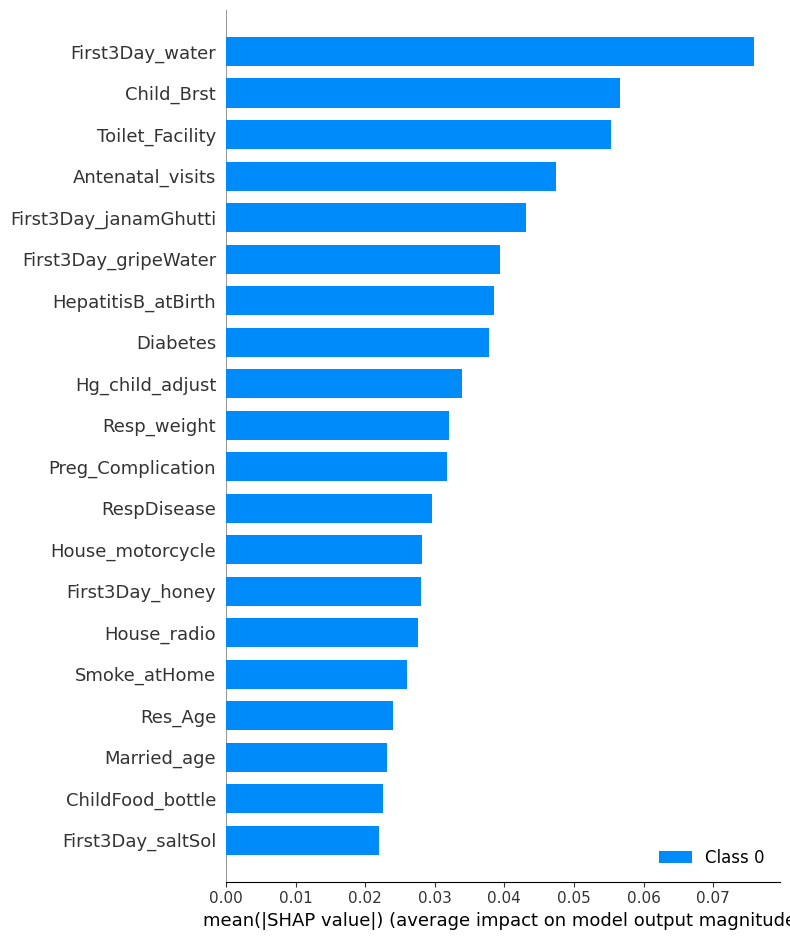

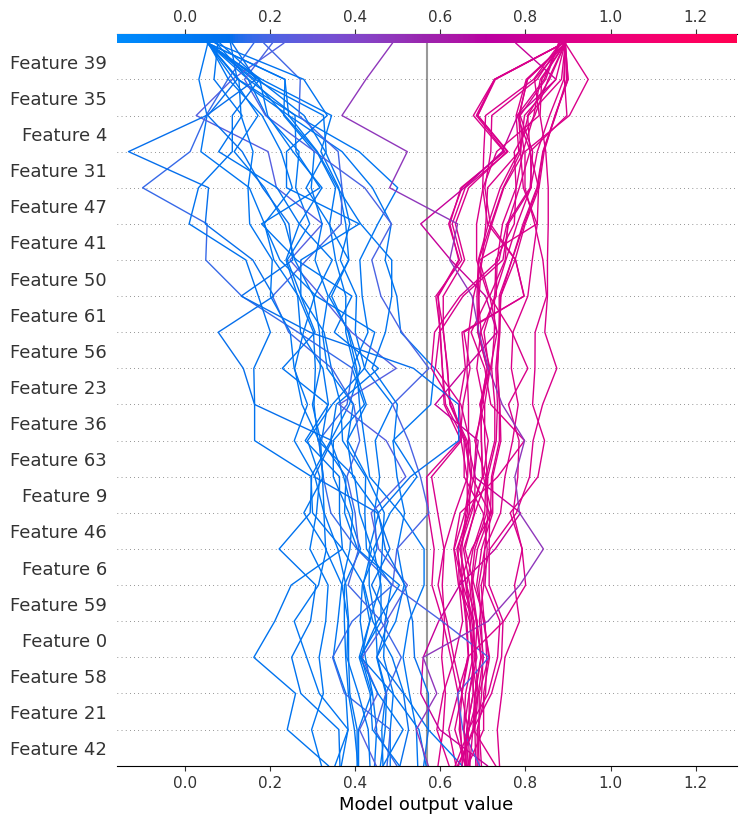

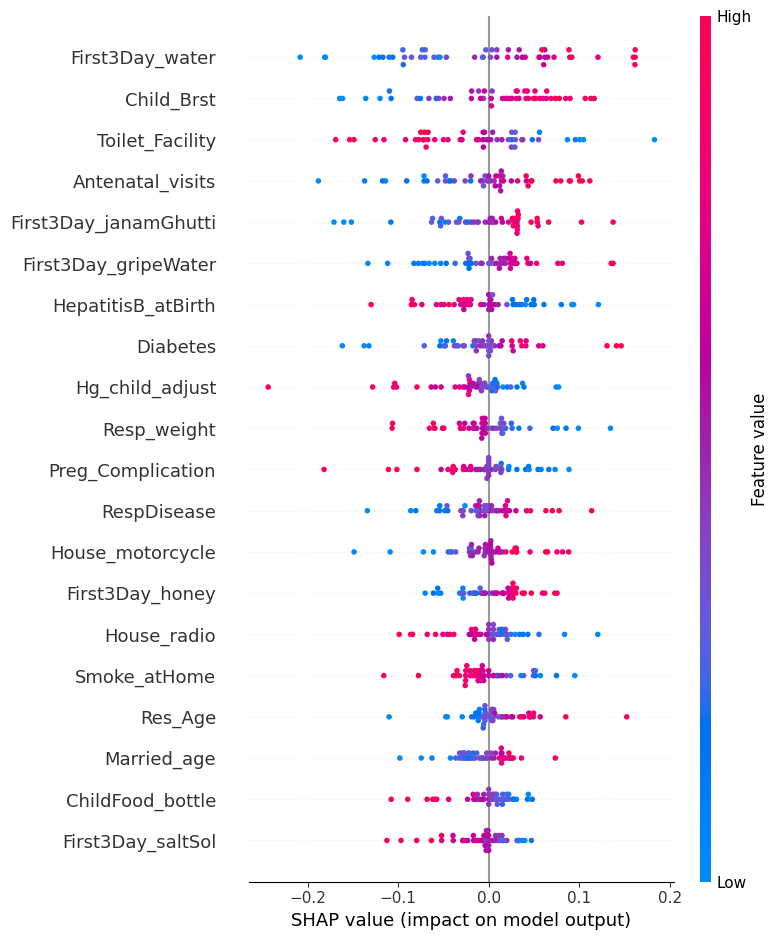

In [20]:

# Summary Plot
X_train_dataframe = pd.DataFrame(X_train)
# Choose an instance from the sample to create a force plot for
instance_index = 0  # Change this to the index of the instance you want
instance_to_explain = sample_instances_test[instance_index]

feature_names = X.columns#X_train_dataframe.columns[:].tolist()
feature_names

import matplotlib.pyplot as plt
shap.summary_plot(shap_values, sample_instances_test, feature_names=feature_names, show=False)
#plt.savefig('/content/drive/MyDrive/Khadija_J3/shap plots/summary_plot.pdf')
#plt.savefig('/content/drive/MyDrive/Khadija_J3/shap plots/summary_plot.eps')
plt.show()


# Decision Plot
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is already calculated as in your code

# Create a decision plot
shap.decision_plot(explainer.expected_value[0], shap_values[0], sample_instances_test, link="identity", show=False)

# Save the plot as an image file (e.g., PNG)
decision_plot_path = "decision_plot.pdf"
plt.savefig(decision_plot_path)

# Display the saved image
plt.show()


# BeaSwarm Plot
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is your list containing the SHAP values
# Assuming feature_names is a list of your feature names

# Generate the beeswarm plot
shap.summary_plot(shap_values[0], features=sample_instances_test[:5000], feature_names=feature_names, show=False)
plt.show
# Save the plot directly to Google Drive
plt.savefig('beeswarm_plot_class1.pdf')
#plt.savefig('/content/drive/MyDrive/Khadija_J3/shap plots/beeswarm_plot_class1.eps')

shap.initjs()  # Required to visualize the plot in the notebook

# Blending

In [21]:
epoch = 5

## lstm

In [22]:
#LSTM

from time import time
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=8, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model

lstm_input = (X_train.shape[1],1)  # DBN input shape
lstm_model = build_lstm_model(lstm_input) # Create DBN model

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time()
lstm_model.fit(X_train, y_train, epochs=epoch, batch_size=256, validation_data=(X_test, y_test))
end_time = time()
Execution_time = end_time - start_time

# Predict on the test data
y_pred = lstm_model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Execution Time: {Execution_time:.2f} seconds")


Epoch 1/5
544/544 [==============================] - 18s 31ms/step - loss: 0.5177 - accuracy: 0.7585 - val_loss: 0.4326 - val_accuracy: 0.8063
Epoch 2/5
544/544 [==============================] - 25s 46ms/step - loss: 0.4122 - accuracy: 0.8082 - val_loss: 0.3954 - val_accuracy: 0.8132
Epoch 3/5
544/544 [==============================] - 16s 30ms/step - loss: 0.3915 - accuracy: 0.8138 - val_loss: 0.3803 - val_accuracy: 0.8159
Epoch 4/5
544/544 [==============================] - 16s 30ms/step - loss: 0.3793 - accuracy: 0.8169 - val_loss: 0.3718 - val_accuracy: 0.8194
Epoch 5/5
1450/1450 [==============================] - 9s 6ms/step
Accuracy: 82.36%
F1 Score: 0.8154
Precision: 0.8593
Recall: 0.7758
Execution Time: 92.07 seconds


## dnn

In [23]:
from time import time

def build_dnn_model(input_shape, num_classes=1, dropout_rate=0.5):
    model = Sequential([
        layers.Dense(16, activation='relu', input_shape=input_shape),
        layers.Dropout(dropout_rate),
        layers.Dense(8, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4, activation='relu'),

        layers.Flatten(),
        # Modify the output layer to have shape (None, 28, 1)
        layers.Dense(1, activation='sigmoid')
    ])
    return model

num_classes = 1
input_shape = (X_train.shape[1], 1)

dnn_model = build_dnn_model(input_shape, num_classes)

# Compile the model
#from keras.optimizers import SGD
#optimizer = SGD(learning_rate=0.0001)
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time()
dnn_model.fit(X_train, y_train, epochs=epoch, batch_size=256, validation_data=(X_test, y_test))
end_time = time()
execution_time = end_time - start_time

# Evaluate the model
y_pred = dnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print evaluation metrics and execution time
print("Test Accuracy:", accuracy)
print('F1 score: %.4f' % f1)
print('Precision: %.4f' % precision)
print('Recall: %.4f' % recall)
print("Execution time: %.2f seconds" % execution_time)


Epoch 1/5
544/544 [==============================] - 9s 13ms/step - loss: 0.5357 - accuracy: 0.7242 - val_loss: 0.4034 - val_accuracy: 0.8605
Epoch 2/5
544/544 [==============================] - 8s 15ms/step - loss: 0.3721 - accuracy: 0.8390 - val_loss: 0.3694 - val_accuracy: 0.8750
Epoch 3/5
544/544 [==============================] - 7s 13ms/step - loss: 0.3440 - accuracy: 0.8524 - val_loss: 0.3875 - val_accuracy: 0.8671
Epoch 4/5
544/544 [==============================] - 8s 15ms/step - loss: 0.3330 - accuracy: 0.8590 - val_loss: 0.4031 - val_accuracy: 0.8533
Epoch 5/5
1450/1450 [==============================] - 3s 2ms/step
Test Accuracy: 0.780069839627522
F1 score: 0.7277
Precision: 0.9621
Recall: 0.5851
Execution time: 40.12 seconds


## GRU

In [24]:
# GRU
from time import time
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(16, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(GRU(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define Input Shape
input_shape = (X_train.shape[1], 1)
gru_model = build_gru_model(input_shape)
#gru_model.summary()

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time()
gru_model.fit(X_train, y_train, epochs=epoch, batch_size=256, validation_data=(X_test, y_test))
end_time = time()

Execution_time = end_time - start_time

# Predict on the test data
y_pred = gru_model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Execution Time: {Execution_time:.2f} seconds")


Epoch 1/5
544/544 [==============================] - 44s 76ms/step - loss: 0.5114 - accuracy: 0.7525 - val_loss: 0.4014 - val_accuracy: 0.8151
Epoch 2/5
544/544 [==============================] - 39s 72ms/step - loss: 0.3905 - accuracy: 0.8156 - val_loss: 0.3740 - val_accuracy: 0.8184
Epoch 3/5
544/544 [==============================] - 37s 69ms/step - loss: 0.3779 - accuracy: 0.8205 - val_loss: 0.3752 - val_accuracy: 0.8211
Epoch 4/5
544/544 [==============================] - 38s 69ms/step - loss: 0.3717 - accuracy: 0.8219 - val_loss: 0.3717 - val_accuracy: 0.8197
Epoch 5/5
1450/1450 [==============================] - 17s 11ms/step
Accuracy: 82.19%
F1 Score: 0.8273
Precision: 0.8066
Recall: 0.8490
Execution Time: 197.04 seconds


## Blending

In [25]:
# *Valid Blending code*
from time import time

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Split the training set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=8, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model

lstm_input = (X_train.shape[1],1)  # DBN input shape
lstm_model = build_lstm_model(lstm_input) # Create DBN model

# lenet_output = lenet_model  # Extract output from DBN model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time()
lstm_model.fit(X_train, y_train, epochs=epoch, batch_size=256, verbose=1)
end = time()

val1=lstm_model.predict(X_val)
test1=lstm_model.predict(X_test)
val11=pd.DataFrame(val1)
test11=pd.DataFrame(test1)

# Calculate evaluation metrics
val_accuracy = accuracy_score(y_test, (test1 > 0.5).astype(int))
val_f1 = f1_score(y_test, (test1 > 0.5).astype(int))
val_precision = precision_score(y_test, (test1 > 0.5).astype(int))
val_recall = recall_score(y_test, (test1 > 0.5).astype(int))
execution_time = end - start

print("lstm")
print(f"blend_m1 Validation Accuracy: {val_accuracy:.3f}")
print(f"blend_m1 Validation F1 Score: {val_f1:.3f}")
print(f"blend_m1 Validation Precision: {val_precision:.3f}")
print(f"blend_m1 Validation Recall: {val_recall:.3f}")
print(f"blend_m1 Execution Time: {execution_time:.2f} seconds")

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(16, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(GRU(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

blend_m2_input = (X_train.shape[1],1)  # DBN input shape
blend_m2 = build_gru_model(blend_m2_input)
blend_m2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time()
blend_m2.fit(X_train, y_train, epochs=epoch, batch_size=256, verbose=1)
end = time()

val2=blend_m2.predict(X_val)
test2=blend_m2.predict(X_test)
val22=pd.DataFrame(val2)
test22=pd.DataFrame(test2)

X_vald=pd.DataFrame(X_val)
df_val=pd.concat([X_vald,val11,val22], axis=1)
X_testd=pd.DataFrame(X_test)
df_test=pd.concat([X_testd,test11,test22], axis=1)

# Calculate evaluation metrics
val_accuracy = accuracy_score(y_test, (test2 > 0.5).astype(int))
val_f1 = f1_score(y_test, (test2 > 0.5).astype(int))
val_precision = precision_score(y_test, (test2 > 0.5).astype(int))
val_recall = recall_score(y_test, (test2 > 0.5).astype(int))
execution_time = end - start

print("gru")
print(f"blend_m2 Validation Accuracy: {val_accuracy:.3f}")
print(f"blend_m2 Validation F1 Score: {val_f1:.3f}")
print(f"blend_m2 Validation Precision: {val_precision:.3f}")
print(f"blend_m2 Validation Recall: {val_recall:.3f}")
print(f"blend_m2 Execution Time: {execution_time:.2f} seconds")


# Assuming df_val is your input data
#df_val_reshaped = np.expand_dims(df_val, axis=-1)  # Add a singleton dimension for input_dim

def build_dnn_model(input_shape, num_classes=1, dropout_rate=0.5):
    model = Sequential([
        layers.Dense(16, activation='relu', input_shape=input_shape),
        layers.Dropout(dropout_rate),
        layers.Dense(8, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4, activation='relu'),

        layers.Flatten(),
        # Modify the output layer to have shape (None, 28, 1)
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Meta Model input Shape
blend_input = (df_val.shape[1],1)
Blend_model = build_dnn_model(blend_input)

# Compile Model
Blend_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time()
Blend_model.fit(df_val, y_val, epochs=epoch, batch_size=256, verbose=1)
end = time()

final_predictions = Blend_model.predict(df_test)
# Convert probabilities to binary labels (e.g., threshold at 0.5)
final_labels = (final_predictions > 0.5).astype(int)

# Evaluate the blending model's performance on the test set
accuracy = accuracy_score(y_test, final_labels)
f1 = f1_score(y_test, final_labels)
precision = precision_score(y_test, final_labels)
recall = recall_score(y_test, final_labels)

execution_time = end - start

print("dnn")
print(f"Blending Model Accuracy: {accuracy}")
print(f"Blending Model F1 Score: {f1}")
print(f"Blending Model Precision: {precision}")
print(f"Blending Model Recall: {recall}")
print(f"Model Execution Time: {execution_time}")


Epoch 1/5
464/464 [==============================] - 14s 27ms/step - loss: 0.5577 - accuracy: 0.7398
Epoch 2/5
464/464 [==============================] - 12s 27ms/step - loss: 0.4494 - accuracy: 0.8001
Epoch 3/5
464/464 [==============================] - 12s 25ms/step - loss: 0.4255 - accuracy: 0.8091
Epoch 4/5
464/464 [==============================] - 12s 25ms/step - loss: 0.4125 - accuracy: 0.8123
Epoch 5/5
1160/1160 [==============================] - 6s 6ms/step
lstm
blend_m1 Validation Accuracy: 0.820
blend_m1 Validation F1 Score: 0.819
blend_m1 Validation Precision: 0.824
blend_m1 Validation Recall: 0.814
blend_m1 Execution Time: 61.98 seconds
Epoch 1/5
464/464 [==============================] - 32s 63ms/step - loss: 0.5343 - accuracy: 0.7334
Epoch 2/5
464/464 [==============================] - 29s 62ms/step - loss: 0.4068 - accuracy: 0.8167
Epoch 3/5
464/464 [==============================] - 29s 63ms/step - loss: 0.3855 - accuracy: 0.8229
Epoch 4/5
464/464 [====================

## SHAP

In [ ]:
!pip install shap


In [28]:
# *SHAP new*

import shap
import tqdm

# Define the function for the hybrid model prediction
def hybrid_predict(sample_instances_test):
    return hybrid_model.predict([sample_instances_test, sample_instances_test])

# Create a sample of instances you want to explain
# sample_instances_train = X_train_scaled[:500]  # Change this to the number of instances you want
sample_instances_train = X_train[:50]
sample_instances_test= X_test[:50] #20 percent test data
# Create a background summary using k-means clustering for the training data
background_summary = shap.kmeans(X_train, 5)

# Create SHAP explainer using KernelExplainer with summarized background data
with tqdm.tqdm(total=len(sample_instances_train)) as pbar:
    explainer = shap.KernelExplainer(hybrid_predict, background_summary)
    pbar.update(len(sample_instances_train))

# Calculate SHAP values for the sample instances
with tqdm.tqdm(total=len(sample_instances_test)) as pbar:
    shap_values = explainer.shap_values(sample_instances_test)
    pbar.update(len(sample_instances_test))

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

340/340 [==============================] - 3s 8ms/step


100%|██████████| 50/50 [02:47<00:00,  3.36s/it]


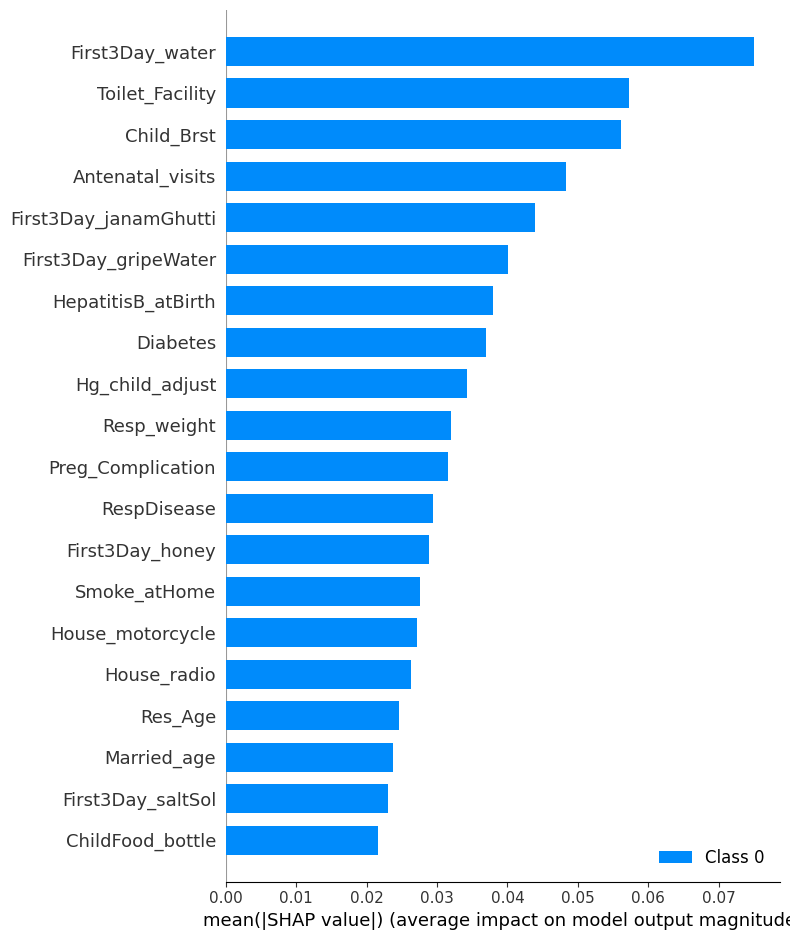

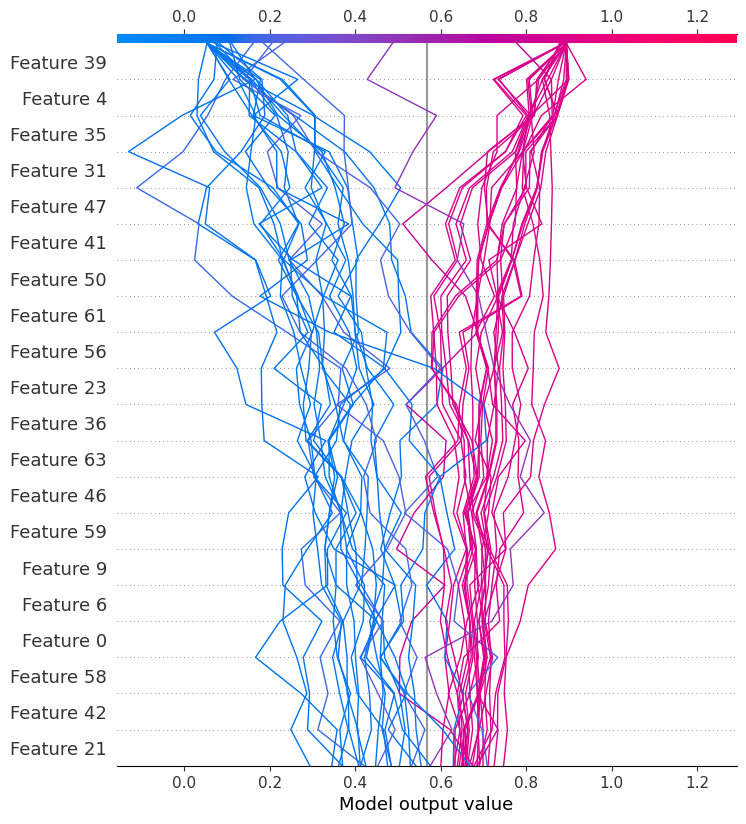

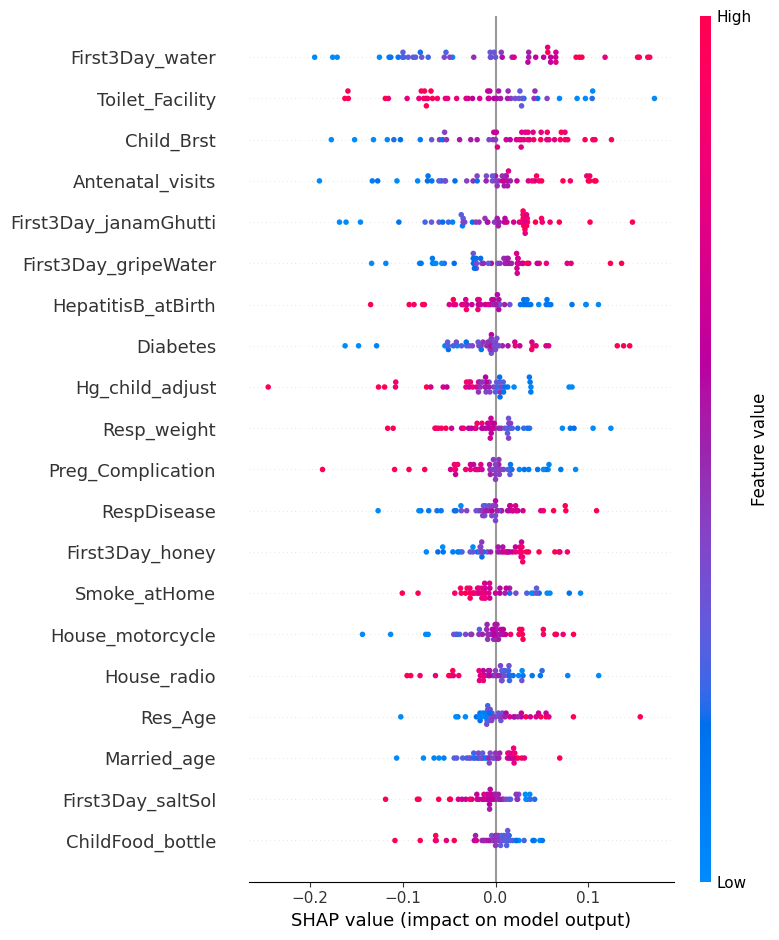

In [29]:

# Summary Plot
X_train_dataframe = pd.DataFrame(X_train)
# Choose an instance from the sample to create a force plot for
instance_index = 0  # Change this to the index of the instance you want
instance_to_explain = sample_instances_test[instance_index]

feature_names = X.columns#X_train_dataframe.columns[:].tolist()
feature_names

import matplotlib.pyplot as plt
shap.summary_plot(shap_values, sample_instances_test, feature_names=feature_names, show=False)
#plt.savefig('/content/drive/MyDrive/Khadija_J3/shap plots/summary_plot.pdf')
#plt.savefig('/content/drive/MyDrive/Khadija_J3/shap plots/summary_plot.eps')
plt.show()


# Decision Plot
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is already calculated as in your code

# Create a decision plot
shap.decision_plot(explainer.expected_value[0], shap_values[0], sample_instances_test, link="identity", show=False)

# Save the plot as an image file (e.g., PNG)
decision_plot_path = "decision_plot.pdf"
plt.savefig(decision_plot_path)

# Display the saved image
plt.show()


# BeaSwarm Plot
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is your list containing the SHAP values
# Assuming feature_names is a list of your feature names

# Generate the beeswarm plot
shap.summary_plot(shap_values[0], features=sample_instances_test[:5000], feature_names=feature_names, show=False)
plt.show
# Save the plot directly to Google Drive
plt.savefig('beeswarm_plot_class1.pdf')
#plt.savefig('/content/drive/MyDrive/Khadija_J3/shap plots/beeswarm_plot_class1.eps')

shap.initjs()  # Required to visualize the plot in the notebook